# Student Prediction Analysis

Author: Yash Sakpal

Data Science and Business Analytics Intern at The Sparks Foundation

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the numbers of hours they studied. Also task to predict How many score a student will get after studying 9.25 hours

In [39]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#importing data
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data Imported Successfully")
df

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the distribution of Scores
 
 in this we have plotted the data points on 2-D graph

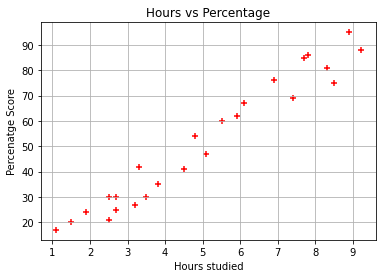

In [42]:
# plotting the distribution of scores

%matplotlib inline
plt.grid()
plt.title ('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percenatge Score')
plt.scatter(df.Hours, df.Scores, color='red', marker='+')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [44]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

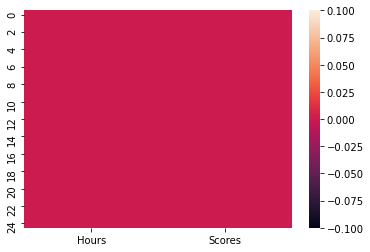

In [45]:
import seaborn as sns
sns.heatmap(df.isnull())

# Splitting dataset into features and label

then splitting features and labels and training and validation set

In [46]:
#splitting dataset into label and features
X=df.iloc [: , 0].values
Y=df.iloc [: , 1].values

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Building the model to predict the values

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1,1),Y)

LinearRegression()

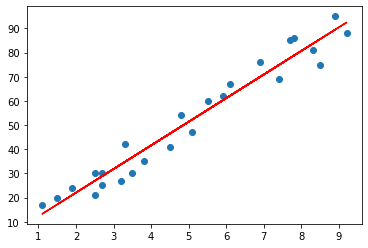

In [49]:
#plotting the regression line
slope= model.coef_*X+model.intercept_

#plotting for test data
plt.scatter(X,Y)
plt.plot(X,slope,c='red')
plt.show()

# Predicting Values

In [29]:
y_pred= model.predict(x_test.reshape(-1,1))

In [50]:
print('Actual Values and predicted values \n')
for i in zip(y_test[:5],y_pred[:5]):
    print(i)

Actual Values and predicted values 

(20, 17.147378491554413)
(27, 33.76624425589311)
(69, 74.82461849720048)
(30, 26.92318188234188)
(62, 60.16091341101927)


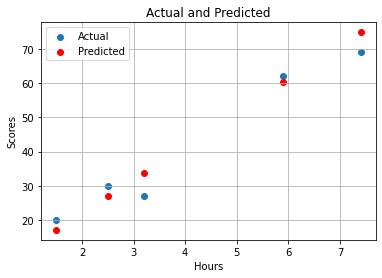

In [51]:
plt.grid()
plt.scatter(x_test,y_test,label='Actual')
plt.scatter(x_test,y_pred,c='red',label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Actual and Predicted')
plt.legend()
plt.show()

# Model Accuracy

In [52]:
model.score(x_test.reshape(-1,1),y_test)

0.9491748734859172

# Calculating Root mean square error

In [53]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE: {mse} \n RMSE :{rmse}")

MSE: 20.138948129940175 
 RMSE :4.487643939746131


# **predicting study hours about 9.25

if any student will study about 9.25 he will get nearly 92.20 Scores in exam

In [54]:
print(f"No.of study Hours:9.25 \n ",
      f"Marks will get : {model.predict([[9.25]])[0]}")

No.of study Hours:9.25 
  Marks will get : 92.9098547701573
